In [1]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

path = "./datasets/open_mi/"
# datasets_name = "Open_MI.tsv"
datasets_name = "query.tsv"
datasets_name = "query_herding_retrieved.tsv"

with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    # 读取第一行（标题行）
    headers = next(tsvreader)
    print("Headers:", headers)

Headers: ['index', 'question', 'answer', 'image', 'support']


index : open_mi_query_0001
question : This is a
answer : blicket


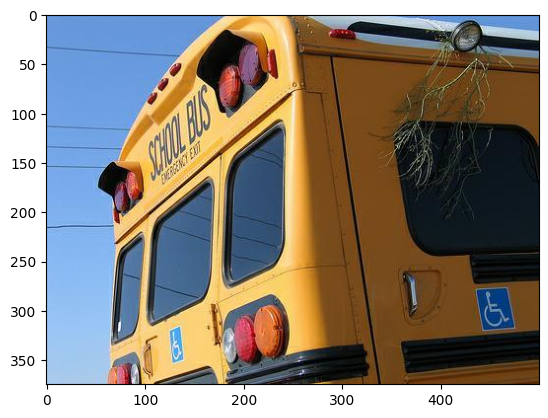

support
{'index': 'open_mi_support_0033_18', 'question': 'This is a', 'answer': 'dax', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAF4AfQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDjY0RbbOMJ14Oay3cNKeMY7VpSzo9uQjcLgHtWbhSWPfpXSN9hoH+c07jrk0m1enFGMk81Ih2

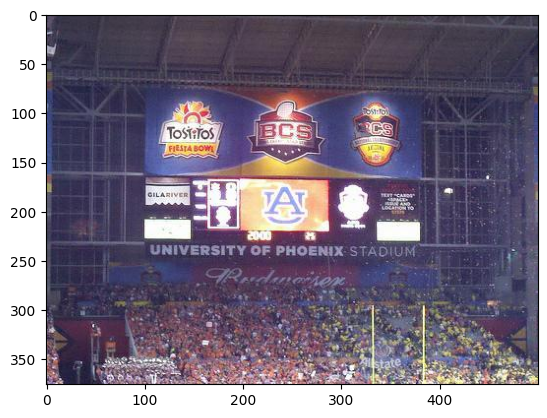

{'index': 'open_mi_support_0062_13', 'question': 'This is a', 'answer': 'perpo', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAM1AlgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwCwQelIxAIBNABxyelIyb+SOlecdwr0LxjNIDRyRSAeSBSe9NIx07U5R0oAXg8GgegNIQKTHFADh0xTR

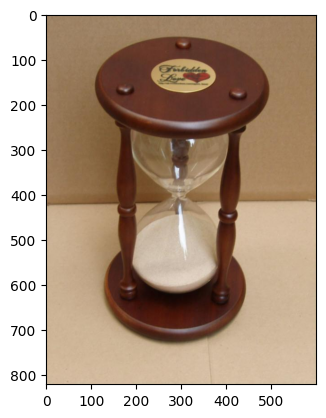

{'index': 'open_mi_support_0022_6', 'question': 'This is a', 'answer': 'dax', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAH0AUwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxkyE5HXPpTTNyM4HtVISv2PX8aUgsASTmm2MtmXBJHJzTTMOm4jPr2qsBnq3vRxtHPbmkBK1xx/hTDOSe

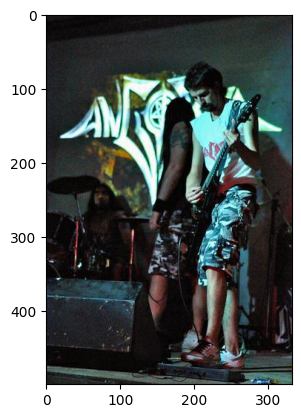

{'index': 'open_mi_support_0169_2', 'question': 'This is a', 'answer': 'shously', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAF3AfQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDibyaW1t4pGhZBJEHRnGAeBk/TPanWd0jSqs8cjoASzQAZ47gN2rW8aX2k2rw6fErMsUStKQPMUqQA

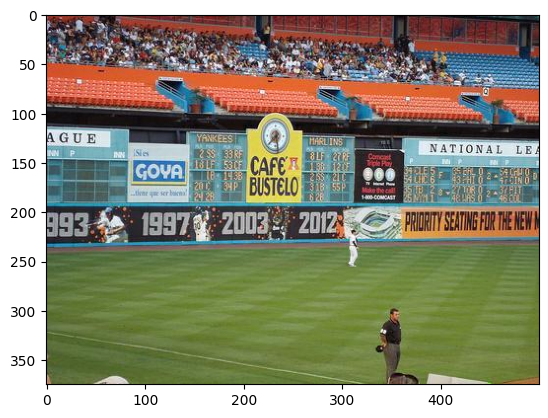

{'index': 'open_mi_support_0041_9', 'question': 'This is a', 'answer': 'perpo', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAF3AfQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDqbdik0TZ6OP5125+8frXDI2UVvYGu3Q7o0b1UH9KcgHDlgPevkPxPbfZdevYcY2TOv5MRX15nFfLfxO

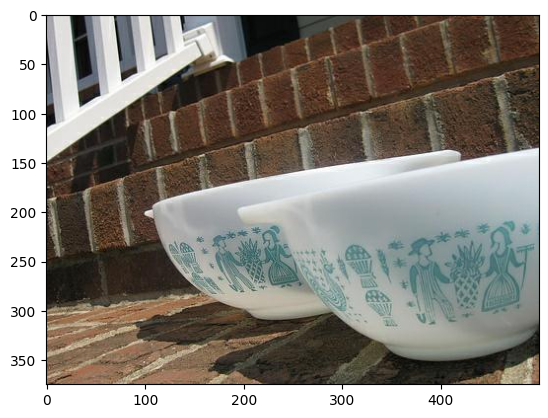

{'index': 'open_mi_support_0041_12', 'question': 'This is a', 'answer': 'blicket', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAF3AfQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDm9HcLdkGuxSNWwcVw9kNl4pzXc2jho19cVVNuxnKKZcjIjTAqjcuzFtoPWrpXIpEiweRmtEyZxur

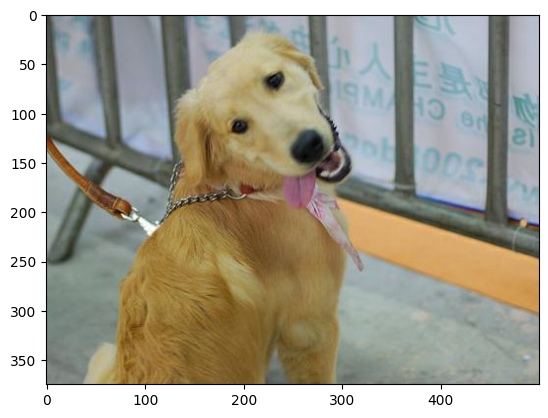

{'index': 'open_mi_support_0041_8', 'question': 'This is a', 'answer': 'slation', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAD9AfQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK

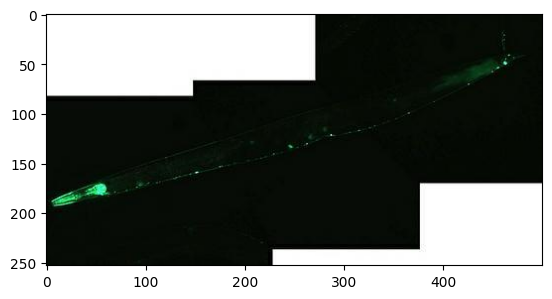

{'index': 'open_mi_support_0041_10', 'question': 'This is a', 'answer': 'dax', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAH0AXcDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxfyG8kSnG3OOTyaaqhhycc0zzD0ycdhQCTnAJ9hWZRMshWORMKd3fHI+lNS5lhcmOV0bsVbFMOR17U0n

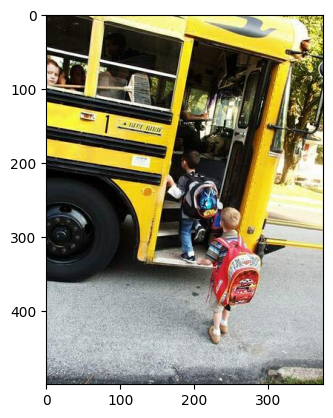

{'index': 'open_mi_support_0062_2', 'question': 'This is a', 'answer': 'dax', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAF3AfQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD36q9zdR20e6Q9egHU/SqHiDWrfQNJn1G53ssYwkafelc8Ki+5P+J4FeO6v8YdUj1M2beH4YbpQPODySym

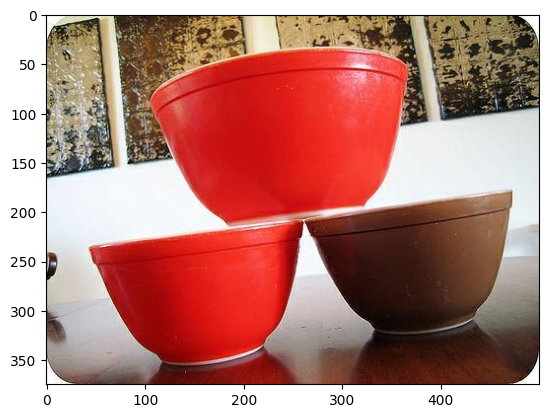

{'index': 'open_mi_support_0062_1', 'question': 'This is a', 'answer': 'slation', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGSAfQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDyfRtHtLzT0nmRy5ZgSHx0xitBfDWmkgeTL1/56n/Cm+HBnR4/99/5itdByOlc0py5nqdUYx5VoOh8

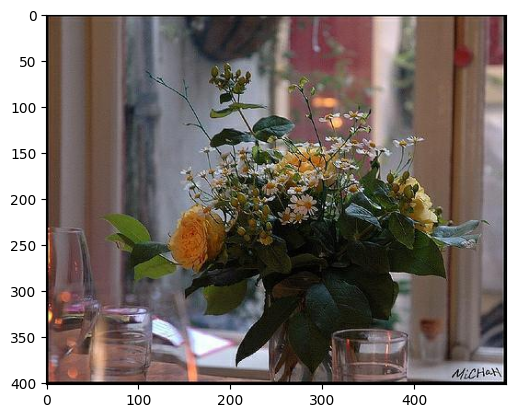

Support Counter: 10


In [2]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# path = "./datasets/clevr/"
path = "./datasets/open_mi/"
# path = "./datasets/clevr/"
# datasets_name = "Open_MI.tsv"
datasets_name = "query.tsv"
datasets_name = "query_herding_retrieved.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    support_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support")
                for item in support:
                    support_counter += 1
                    print(item)
                    print("Item ID:", item['index'])
                    print("Question:", item['question'])
                    print("Answer:", item['answer'])
                    img = item['image']
                    img = Image.open(BytesIO(base64.b64decode(img)))
                    plt.imshow(img)
                    plt.show()
                    
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break
print("Support Counter:", support_counter)

In [1]:
path = "/home/zxy/LMUData/"
datasets_name = "MME.tsv"
import csv
# Increase the field size limit
csv.field_size_limit(10000000)


with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    row_counter = 0
    categories_set = set()
    category_count = {}
    for row in tsvreader:
        # get the index of the columns
        category_index = headers.index("category")
        # question_index = headers.index("question")
        # answer_index = headers.index("answer")
        # image_index = headers.index("image")
        # print(
        #     "category: {} \n".format(
        #         # row_counter,
        #         row[category_index],
        #         # row[question_index],
        #         # row[answer_index],
        #     )
        # )
        category = row[category_index]
        categories_set.add(category)
        if category in category_count:
            category_count[category] += 1
        else:
            category_count[category] = 1
        

    print("Total categories: ", len(categories_set))
    print(category_count)

FileNotFoundError: [Errno 2] No such file or directory: '/home/zxy/LMUData/MME.tsv'

In [31]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

path = "./LMUData/"
# datasets_name = "Open_MI.tsv"
datasets_name = "Open_MI.tsv.merge"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                for key in support:
                    # image_base64 = support[key]['images']
                    # for img in image_base64:
                    #     img = Image.open(BytesIO(base64.b64decode(img)))
                    #     plt.imshow(img)
                    #     plt.show()
                    print(f"{key}: ---------\n ")
                    # for idx in support[key]['image_path']:
                    #     print(f"{idx}")
                    for img, img_path in zip(support[key]['image'], support[key]['image_path']):
                        img = Image.open(BytesIO(base64.b64decode(img)))
                        plt.imshow(img)
                        plt.show()
                        print(f"{img_path}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break

# Clevr dataset

In [ ]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import json

path = "./LMUData/"
datasets_name = "CLEVR.tsv"
datasets_name = "CLEVR_new.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)
    print(headers)
    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support ---")
                for item in support:
                    for key, value in item.items():
                        if key == "image":
                            img = Image.open(BytesIO(base64.b64decode(value)))
                            plt.imshow(img)
                            plt.show()
                        else:
                            print(f"{key}: {value}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break

# operator_induction

['index', 'question', 'answer', 'operator', 'image', 'support']
index : operator_induction_query_1_1_+
question : What is the result of the following mathematical expression?
answer : 2
operator : +


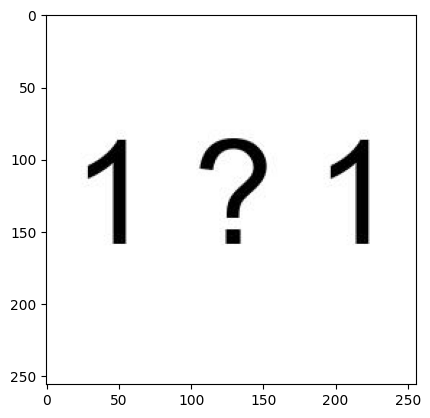

support ---
question: What is the result of the following mathematical expression?
answer: [13, 1, 42]


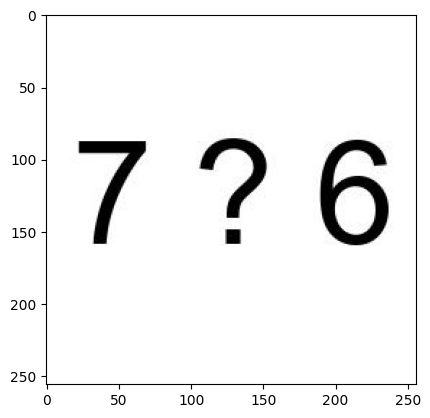

index: operator_induction_support_7_6
question: What is the result of the following mathematical expression?
answer: [8, -4, 12]


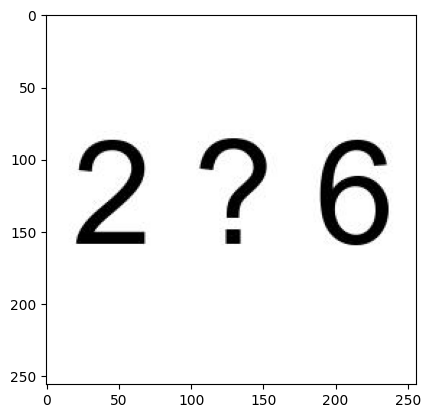

index: operator_induction_support_2_6
question: What is the result of the following mathematical expression?
answer: [12, 6, 27]


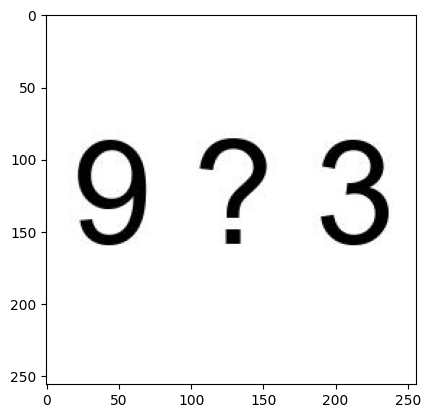

index: operator_induction_support_9_3
question: What is the result of the following mathematical expression?
answer: [11, -3, 28]


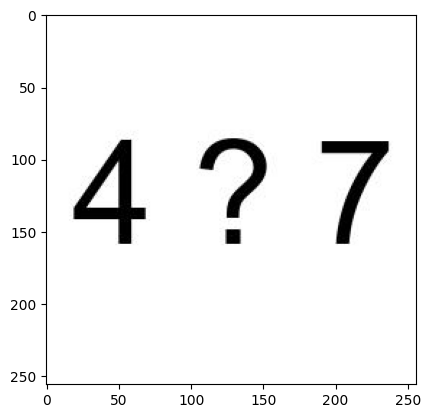

index: operator_induction_support_4_7
question: What is the result of the following mathematical expression?
answer: [11, -7, 18]


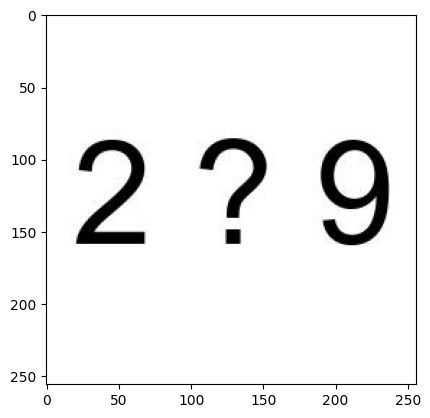

index: operator_induction_support_2_9
question: What is the result of the following mathematical expression?
answer: [11, 1, 30]


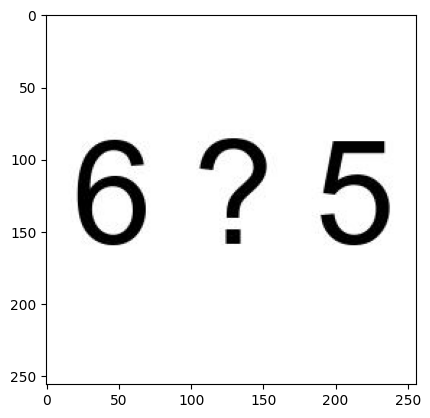

index: operator_induction_support_6_5
question: What is the result of the following mathematical expression?
answer: [5, 3, 4]


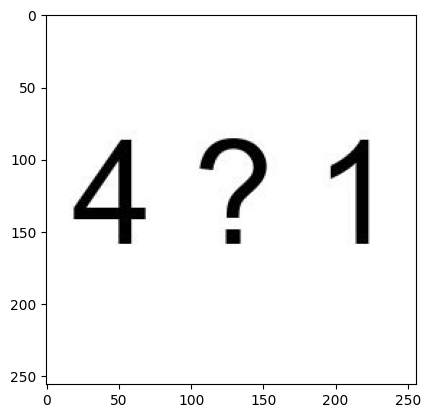

index: operator_induction_support_4_1
question: What is the result of the following mathematical expression?
answer: [13, 3, 40]


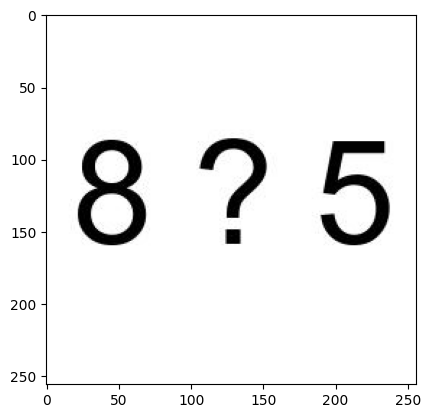

index: operator_induction_support_8_5


In [7]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import json

path = "./LMUData/"
# datasets_name = "CLEVR.tsv"
datasets_name = "operator_induction_new.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)
    print(headers)
    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support ---")
                for item in support:
                        for key, value in item.items():
                            if key == "image":
                                img = Image.open(BytesIO(base64.b64decode(value)))
                                plt.imshow(img)
                                plt.show()
                            else:
                                print(f"{key}: {value}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break